## Introduction

 World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.



In [182]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [183]:
heart= pd.read_csv("/Users/azharsharieff/Desktop/Logistic_Reg_heart_dis_prognosis/framingham.csv")
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Exploratory Data Analysis

### Data understanding

In [184]:
heart.shape

(4240, 16)

In [185]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [186]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [187]:
#Identifying missing values
(heart.isnull().sum())/len(heart.male)* 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

Since the % of missing value is very low it is better we drop the rows with missing values.

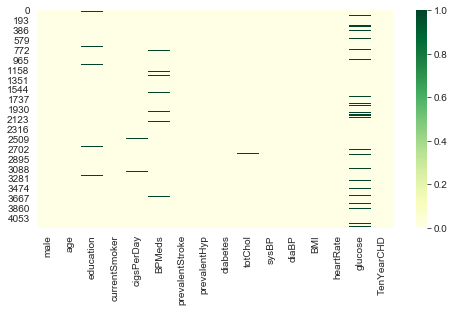

In [188]:
# ploting heatmap to show missing value
plt.figure(figsize=(8,4))
sns.heatmap(heart.isnull(),cmap = "YlGn")
plt.show()

In [189]:
#dropping rows with missing value
heart.dropna(inplace = True, axis = 0)

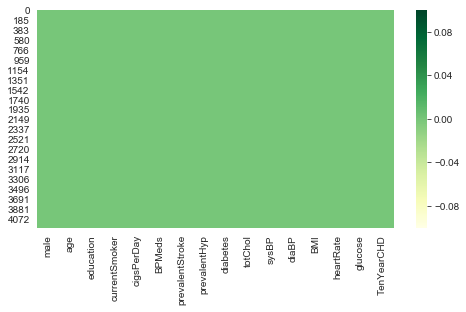

In [190]:
# plotting heatmap to check missing values
plt.figure(figsize=(8,4))
sns.heatmap(heart.isnull(), cmap="YlGn")
plt.show()

In [191]:
heart.isnull().sum()/len(heart.male)* 100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [192]:
heart.shape

(3658, 16)

### Outlier Analysis

In [193]:
# function to remove outliers
def outlier_treat(df_name, col):
    Q1 = df_name[col].quantile(0.25)
    Q3 = df_name[col].quantile(0.75)
    IQR = Q3-Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5 * IQR
    df_name = df_name.loc[(df_name[col] > low) & (df_name[col] < high)]
    return df_name

In [194]:
# Removing outliers
heart = outlier_treat(heart,'cigsPerDay')
heart = outlier_treat(heart,'totChol')
heart = outlier_treat(heart,'sysBP')
heart = outlier_treat(heart,'diaBP')
heart = outlier_treat(heart,'BMI')
heart = outlier_treat(heart,'heartRate')
heart = outlier_treat(heart,'glucose')

In [195]:
heart.shape

(3163, 16)

In [196]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Univariate analysis

#### Categorical variable

In [197]:
heart.select_dtypes(exclude=object).head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


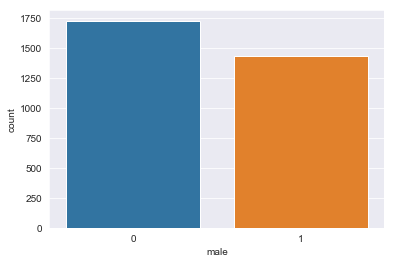

In [198]:
# checking the count of male and female
sns.countplot(heart.male)
plt.show()

The dataset contains more information about females than males.

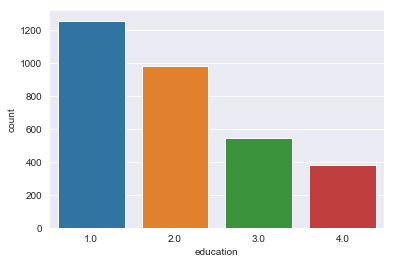

In [199]:
# analysis of education
sns.set_style("darkgrid")
sns.countplot(heart.education)
plt.show()

Most of the people (>1200) are at education level 1, followed by level 2(<1000) followed by level 3 (<600)and level 4 (<400)

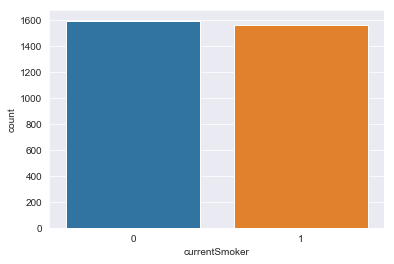

In [200]:
sns.countplot(heart.currentSmoker)
plt.show()

The data contains information of approximately equal number of current smokers and non current smokers.

#### Numerical variable

[]

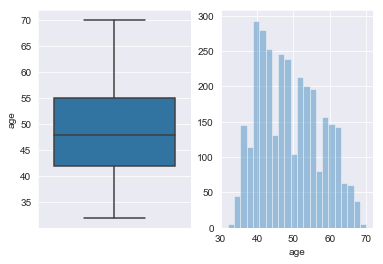

In [201]:
# analysis of age
plt.subplot(1,2,1)
sns.boxplot(heart.age, orient = "v")

plt.subplot(1,2,2)
sns.distplot(heart.age, kde =False)
plt.plot()

Most of the people's age is between 43 to 55.

In [20]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


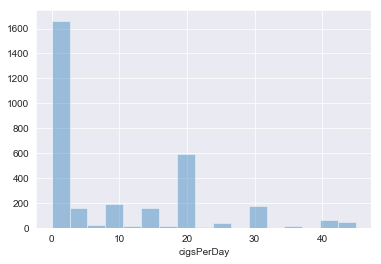

In [21]:
# univariate analysis of cigsPerDay
sns.distplot(heart.cigsPerDay, kde = False)
plt.show()

Most of the people smoke less than 10 cigrets per day. The distrition is right skewed. 

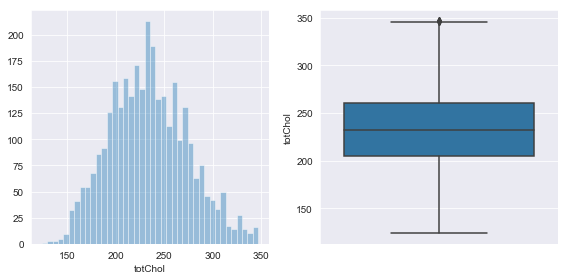

In [220]:
# univariate analysis - total cholorestrol
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(heart.totChol,kde =False, bins = 40)

plt.subplot(122)
sns.boxplot(heart.totChol, orient='v')
plt.tight_layout()
plt.show()



The distribution is normal. The average value of total cholorestrol is approximately 230.

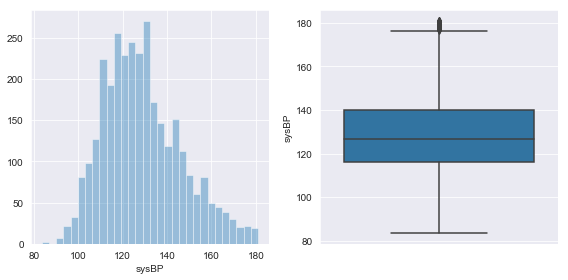

In [215]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(heart.sysBP, kde = False)

plt.subplot(122)
sns.boxplot(heart.sysBP, orient='v')
plt.tight_layout()
plt.show()

The distribution of the systolic blood pressure is slightly right skewed. The average systolic blood pressure is 
approximately around 128-130.

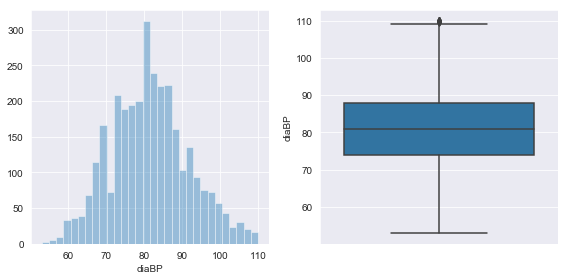

In [223]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(heart.diaBP, kde = False)

plt.subplot(122)
sns.boxplot(heart.diaBP, orient='v')
plt.tight_layout()
plt.show()



The distribution of Diastolic Blood Pressure is normal, the average diastolic blood pressure is 81.

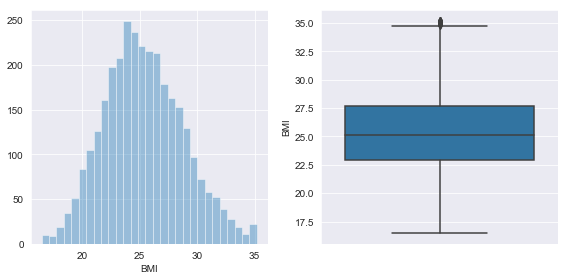

In [225]:
# univariate analysis - BMI
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(heart.BMI, kde = False)

plt.subplot(122)
sns.boxplot(heart.BMI, orient='v')
plt.tight_layout()
plt.show()

The distribution is normal, the average BMI is 26

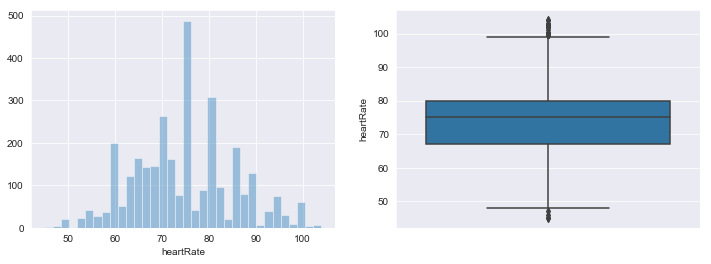

In [25]:
# univariate analysis - heartRate
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(heart.heartRate, kde= False)


plt.subplot(1,2,2)
sns.boxplot(heart.heartRate,orient="v")
plt.show()

From the above plots, the average heart rate of a  person is around 75.

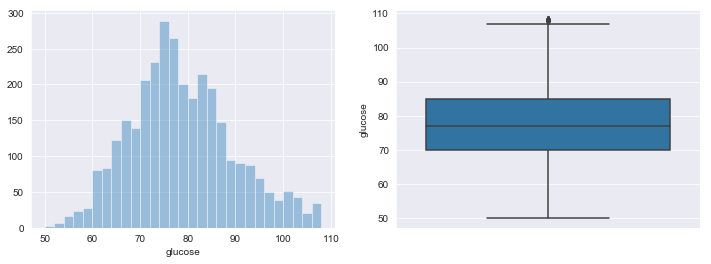

In [226]:
# univariate analysis - glucose
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(heart.glucose, kde = False)

plt.subplot(1,2,2)
sns.boxplot(heart.glucose, orient="v")
plt.show()


The distribution of glucose level is normal and the average glucose level approximately is 76.

### Bivariate Analysis

#### Categorical variables

In [27]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


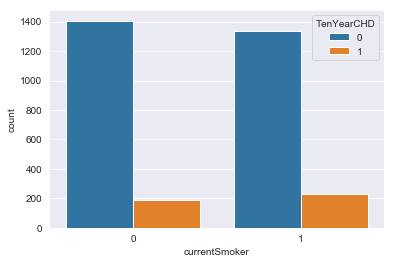

In [227]:
# bivariae analysis of current smoker vs education
sns.countplot(heart.currentSmoker, hue=heart['TenYearCHD'])
plt.show()

From the above plot we can see that smoking is more prominent in people having education level 1. As the level of education goes up the number of the number of smokers drop.

In [30]:
heart['BPMeds'].value_counts()

0.0    3102
1.0      61
Name: BPMeds, dtype: int64

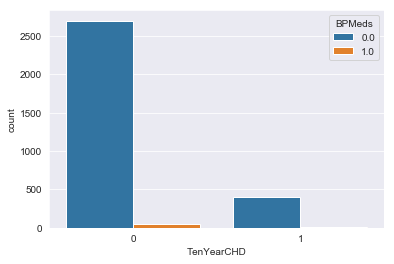

In [243]:
# Bivariate analysis of BPMeds v/s tolChol
sns.countplot(heart.TenYearCHD,hue=heart['BPMeds'])

In [32]:
print(heart.groupby('BPMeds')['totChol'].mean())

BPMeds
0.0    233.806576
1.0    248.983607
Name: totChol, dtype: float64


The average cholorestrol levels in people on BP medicines is 260 and those not on BP medicines is 236

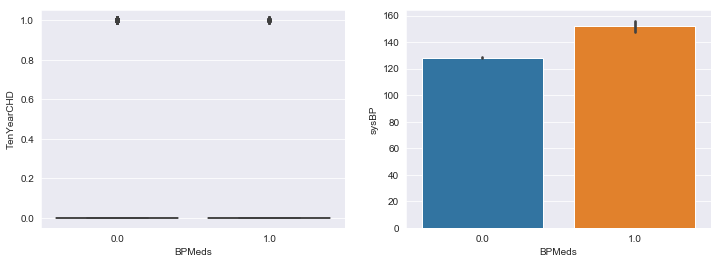

In [239]:
# bivariae analysis of systolic blood pressure v/ Bp med
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x = heart.BPMeds, y = heart.TenYearCHD)

plt.subplot(1,2,2)
sns.barplot(x =heart.BPMeds, y = heart.sysBP)
plt.show()

In [34]:
print(heart.groupby('BPMeds')['sysBP'].mean())

BPMeds
0.0    128.295455
1.0    151.811475
Name: sysBP, dtype: float64


The people who are on BP medicines have systolic BP around 166, while those who are not on BP medicines have the average systolic blood pressure of 166.

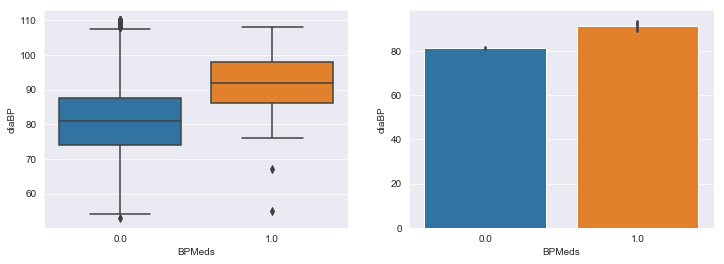

In [35]:
# bivariae analysis of diastolic blood pressure v/ Bp med
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x =heart.BPMeds , y = heart.diaBP)

plt.subplot(1,2,2)
sns.barplot(x = heart.BPMeds, y = heart.diaBP)
plt.show()

In [36]:
m = heart.groupby('BPMeds')['diaBP'].mean()
round(pd.DataFrame(m),2)

,diaBP
BPMeds,
0.0,81.21
1.0,91.38


The average dia stolic blood pressure of people who are BP medicine is around 96, while those who are not on BP medicines is 82. 

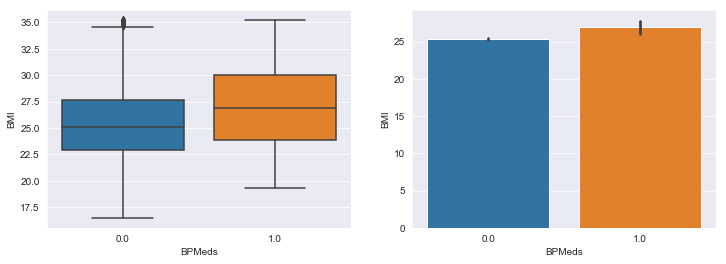

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x = heart.BPMeds, y = heart.BMI)

plt.subplot(1,2,2)
sns.barplot(x=heart.BPMeds, y=heart.BMI)
plt.show()

In [38]:
round(pd.DataFrame(heart.groupby('BPMeds')['BMI'].mean()),2)

,BMI
BPMeds,
0.0,25.33
1.0,26.91


From the above plots and the table, the average BMI of people on BP medicine is 28 and those no on BP medicines is 25. There are outliers in the data, which needs to treated.

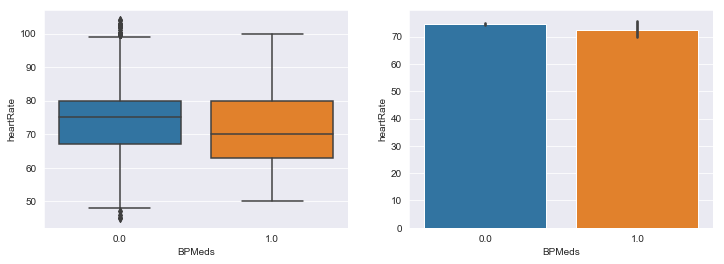

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=heart.BPMeds,y=heart.heartRate)

plt.subplot(1,2,2)
sns.barplot(x = heart.BPMeds, y = heart.heartRate)
plt.show()

In [40]:
pd.DataFrame(heart.groupby('BPMeds')['heartRate'].mean())

,heartRate
BPMeds,
0.0,74.598324
1.0,72.590164


In [41]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


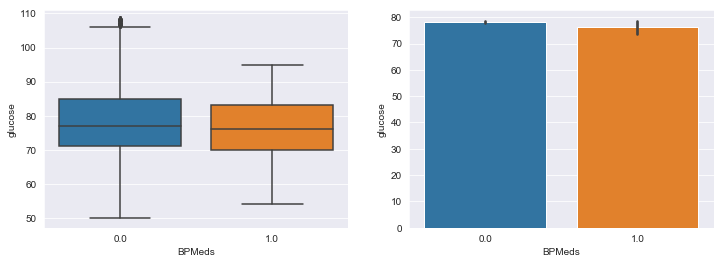

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x = heart['BPMeds'], y = heart['glucose'])

plt.subplot(1,2,2)
sns.barplot(x = heart['BPMeds'], y=heart['glucose'])
plt.show()

In [43]:
round(pd.DataFrame(heart.groupby('BPMeds')['glucose'].mean()),2)

,glucose
BPMeds,
0.0,78.26
1.0,76.20


From the above plots and the table, people on BPMeds have average glucoes of 76 while people not on BP medicine have
average glucose of 78.

### Train - Test split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [46]:
X = heart.drop('TenYearCHD', axis = 1)
y = heart['TenYearCHD']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.70, random_state = 100)

### Feature scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
heart[['totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.fit_transform(heart[['totChol','sysBP','diaBP','BMI','heartRate','glucose']])

In [50]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,-0.970383,-1.291102,-1.110547,0.466719,0.506669,-0.112142,0
1,0,46,2.0,0,0.0,0.0,0,0,0,0.394631,-0.439788,-0.039970,0.977083,1.903629,-0.204035,0
2,1,48,1.0,1,20.0,0.0,0,0,0,0.270539,-0.070885,-0.137295,-0.005948,0.041015,-0.755391,0
3,0,61,3.0,1,30.0,0.0,0,1,0,-0.225830,1.206087,1.322582,0.933586,-0.890292,2.277069,1
4,0,46,3.0,1,23.0,0.0,0,0,0,1.263277,0.071001,0.252005,-0.655503,0.972322,0.623000,0


### Model Building

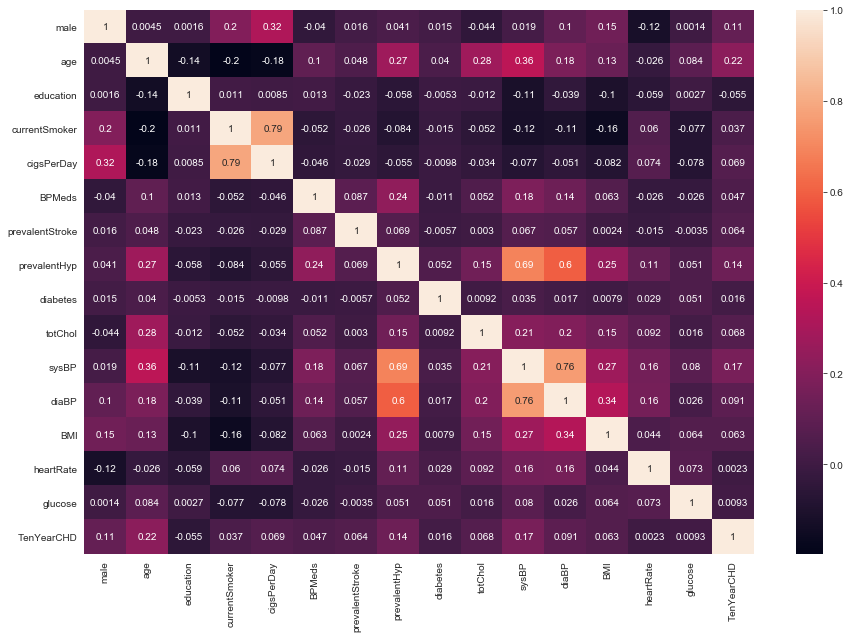

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(), annot = True)

In [52]:
import statsmodels.api as sm

In [53]:
# adding the constant
X_train_sm = sm.add_constant(X_train)

In [54]:
logm1 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

In [55]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2198
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -758.15
Date:                Mon, 09 Sep 2019   Deviance:                       1516.3
Time:                        00:57:04   Pearson chi2:                 2.22e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7554      1.159     -7.554      0.000     -11.027      -6.484
male                0.6132      0.149      4.119      0.000       0.321       0.905
age                 0.0697      0.009      7.760      0.000       0.052       0.087
education          -0.0187      0.066     -0.285      0.776      -0.148       0.110
currentSmoker       0.0143      0.224      0.064      0.949      -0.425       0.454
cigsPerDay          0.0208      0.009      2.294      0.022       0.003       0.039
BPMeds             -0.2763      0.463     -0.597      0.551      -1.184       0.631
prevalentStroke     1.3350      0.648      2.061      0.039       0.065       2.605
prevalentHyp        0.1042      0.201      0.518      0.604      -0.290       0.498
diabetes           -0.4415      0.800     -0.552      0.581      -2.009       1.126
totChol             0.0011      0.002      0.627      0.530      -0.002       0.005
sysBP               0.0232      0.006      3.601      0.000       0.011       0.036
diaBP              -0.0119      0.010     -1.172      0.241      -0.032       0.008
BMI                 0.0133      0.021      0.632      0.527      -0.028       0.054
heartRate          -0.0008      0.007     -0.117      0.907      -0.014       0.012
glucose             0.0019      0.006      0.310      0.756      -0.010       0.014
===================================================================================
"""

### Building model using Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
logreg = LogisticRegression()

In [58]:
rfe = RFE(logreg,12)
rfe = rfe.fit(X_train,y_train)

In [59]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False])

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('male', True, 1),
 ('age', True, 1),
 ('education', True, 1),
 ('currentSmoker', True, 1),
 ('cigsPerDay', True, 1),
 ('BPMeds', True, 1),
 ('prevalentStroke', True, 1),
 ('prevalentHyp', True, 1),
 ('diabetes', True, 1),
 ('totChol', False, 4),
 ('sysBP', True, 1),
 ('diaBP', True, 1),
 ('BMI', True, 1),
 ('heartRate', False, 2),
 ('glucose', False, 3)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'BMI'],
      dtype='object')

In [62]:
## assesing model using stats model

In [63]:
# adding constant
X_train_sm =sm.add_constant(X_train[col])

logm = sm.GLM(y_train,X_train_sm)
res = logm.fit()

In [64]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2201
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.10337
Method:                          IRLS   Log-Likelihood:                -622.74
Date:                Mon, 09 Sep 2019   Deviance:                       227.52
Time:                        00:57:04   Pearson chi2:                     228.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4846      0.092     -5.263      0.000      -0.665      -0.304
male                0.0594      0.015      3.973      0.000       0.030       0.089
age                 0.0073      0.001      8.136      0.000       0.006       0.009
education          -0.0016      0.007     -0.242      0.809      -0.015       0.012
currentSmoker       0.0032      0.023      0.142      0.887      -0.041       0.048
cigsPerDay          0.0021      0.001      2.123      0.034       0.000       0.004
BPMeds             -0.0401      0.054     -0.737      0.461      -0.147       0.067
prevalentStroke     0.2876      0.094      3.067      0.002       0.104       0.471
prevalentHyp        0.0237      0.022      1.065      0.287      -0.020       0.067
diabetes           -0.0492      0.090     -0.549      0.583      -0.225       0.127
sysBP               0.0028      0.001      3.911      0.000       0.001       0.004
diaBP              -0.0021      0.001     -1.909      0.056      -0.004    5.56e-05
BMI                 0.0008      0.002      0.368      0.713      -0.003       0.005
===================================================================================
"""

In [65]:
# checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i)for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending =False)

In [67]:
vif

,Features,VIF
9,sysBP,166.20
10,diaBP,154.28
11,BMI,54.27
1,age,36.56
3,currentSmoker,5.18
2,education,4.66
4,cigsPerDay,4.58
0,male,2.15
7,prevalentHyp,1.95
5,BPMeds,1.09


The features with high P value and High VIF needs to be dropped.

In [68]:
# dropping feature - currentSmoker
col = col.drop('currentSmoker',1)

In [69]:
# Re building the model and checking the VIF
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm)
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2202
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.10332
Method:                          IRLS   Log-Likelihood:                -622.75
Date:                Mon, 09 Sep 2019   Deviance:                       227.52
Time:                        00:57:04   Pearson chi2:                     228.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4819      0.090     -5.347      0.000      -0.659      -0.305
male                0.0592      0.015      3.977      0.000       0.030       0.088
age                 0.0073      0.001      8.161      0.000       0.006       0.009
education          -0.0017      0.007     -0.247      0.805      -0.015       0.012
cigsPerDay          0.0022      0.001      3.482      0.000       0.001       0.003
BPMeds             -0.0402      0.054     -0.739      0.460      -0.147       0.066
prevalentStroke     0.2878      0.094      3.069      0.002       0.104       0.472
prevalentHyp        0.0237      0.022      1.066      0.286      -0.020       0.067
diabetes           -0.0491      0.090     -0.548      0.584      -0.225       0.127
sysBP               0.0028      0.001      3.917      0.000       0.001       0.004
diaBP              -0.0021      0.001     -1.921      0.055      -0.004     4.2e-05
BMI                 0.0008      0.002      0.354      0.723      -0.003       0.005
===================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [71]:
vif

,Features,VIF
8,sysBP,165.06
9,diaBP,154.28
10,BMI,54.20
1,age,36.54
2,education,4.66
0,male,2.12
6,prevalentHyp,1.92
3,cigsPerDay,1.80
4,BPMeds,1.09
5,prevalentStroke,1.02


In [72]:
# dropping education due to high VIF
col = col.drop('sysBP',1)

In [73]:
# Rebuilding the model and checking VIF
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm)
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2203
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.10400
Method:                          IRLS   Log-Likelihood:                -630.43
Date:                Mon, 09 Sep 2019   Deviance:                       229.10
Time:                        00:57:05   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3860      0.087     -4.436      0.000      -0.557      -0.215
male                0.0544      0.015      3.650      0.000       0.025       0.084
age                 0.0082      0.001      9.482      0.000       0.007       0.010
education          -0.0040      0.007     -0.587      0.557      -0.017       0.009
cigsPerDay          0.0022      0.001      3.484      0.000       0.001       0.003
BPMeds             -0.0359      0.055     -0.659      0.510      -0.143       0.071
prevalentStroke     0.2894      0.094      3.076      0.002       0.105       0.474
prevalentHyp        0.0579      0.021      2.824      0.005       0.018       0.098
diabetes           -0.0421      0.090     -0.467      0.640      -0.218       0.134
diaBP               0.0005      0.001      0.611      0.542      -0.001       0.002
BMI                 0.0007      0.002      0.335      0.737      -0.003       0.005
===================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)

In [75]:
vif

,Feature,VIF
8,diaBP,66.00
9,BMI,53.46
1,age,30.61
2,education,4.66
0,male,2.09
3,cigsPerDay,1.79
6,prevalentHyp,1.75
4,BPMeds,1.09
5,prevalentStroke,1.02
7,diabetes,1.01


In [76]:
# dropping diaBP due to high VIF
col = col.drop('diaBP',1)

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm)
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2204
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.10397
Method:                          IRLS   Log-Likelihood:                -630.62
Date:                Mon, 09 Sep 2019   Deviance:                       229.14
Time:                        00:57:05   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3535      0.069     -5.136      0.000      -0.488      -0.219
male                0.0550      0.015      3.699      0.000       0.026       0.084
age                 0.0082      0.001      9.484      0.000       0.007       0.010
education          -0.0039      0.007     -0.581      0.561      -0.017       0.009
cigsPerDay          0.0022      0.001      3.467      0.001       0.001       0.003
BPMeds             -0.0368      0.055     -0.674      0.500      -0.144       0.070
prevalentStroke     0.2913      0.094      3.099      0.002       0.107       0.476
prevalentHyp        0.0648      0.017      3.795      0.000       0.031       0.098
diabetes           -0.0432      0.090     -0.481      0.631      -0.220       0.133
BMI                 0.0010      0.002      0.498      0.618      -0.003       0.005
===================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [79]:
vif

,Features,VIF
8,BMI,28.28
1,age,25.30
2,education,4.43
0,male,2.09
3,cigsPerDay,1.76
6,prevalentHyp,1.51
4,BPMeds,1.08
5,prevalentStroke,1.02
7,diabetes,1.01


In [80]:
# dropping col BMI due to high VIF and high P value
col = col.drop('BMI',1)

In [81]:
# Rebuilding the model and calculating VIF
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm)
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2205
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.10393
Method:                          IRLS   Log-Likelihood:                -630.74
Date:                Mon, 09 Sep 2019   Deviance:                       229.17
Time:                        00:57:05   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3284      0.047     -6.987      0.000      -0.421      -0.236
male                0.0564      0.015      3.871      0.000       0.028       0.085
age                 0.0083      0.001      9.522      0.000       0.007       0.010
education          -0.0042      0.007     -0.626      0.531      -0.017       0.009
cigsPerDay          0.0022      0.001      3.435      0.001       0.001       0.003
BPMeds             -0.0364      0.055     -0.668      0.504      -0.143       0.070
prevalentStroke     0.2903      0.094      3.089      0.002       0.106       0.475
prevalentHyp        0.0666      0.017      3.989      0.000       0.034       0.099
diabetes           -0.0435      0.090     -0.483      0.629      -0.220       0.133
===================================================================================
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending =False)

In [83]:
vif

,Features,VIF
1,age,5.38
2,education,4.15
0,male,2.04
3,cigsPerDay,1.73
6,prevalentHyp,1.50
4,BPMeds,1.08
5,prevalentStroke,1.02
7,diabetes,1.01


In [84]:
# dropping diabetes due to high p value
col = col.drop('diabetes',1)

In [85]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm)
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2206
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.10390
Method:                          IRLS   Log-Likelihood:                -630.86
Date:                Mon, 09 Sep 2019   Deviance:                       229.19
Time:                        00:57:05   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3278      0.047     -6.978      0.000      -0.420      -0.236
male                0.0563      0.015      3.865      0.000       0.028       0.085
age                 0.0082      0.001      9.512      0.000       0.007       0.010
education          -0.0042      0.007     -0.622      0.534      -0.017       0.009
cigsPerDay          0.0022      0.001      3.443      0.001       0.001       0.003
BPMeds             -0.0358      0.054     -0.658      0.511      -0.143       0.071
prevalentStroke     0.2908      0.094      3.095      0.002       0.107       0.475
prevalentHyp        0.0663      0.017      3.974      0.000       0.034       0.099
===================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending =False)

In [87]:
vif

,Features,VIF
1,age,5.37
2,education,4.14
0,male,2.04
3,cigsPerDay,1.73
6,prevalentHyp,1.50
4,BPMeds,1.08
5,prevalentStroke,1.02


In [88]:
# dropping education due to high p value
col = col.drop('education',1)

In [89]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm)
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2207
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                         0.10387
Method:                          IRLS   Log-Likelihood:                -631.05
Date:                Mon, 09 Sep 2019   Deviance:                       229.23
Time:                        00:57:05   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3397      0.043     -7.915      0.000      -0.424      -0.256
male                0.0561      0.015      3.853      0.000       0.028       0.085
age                 0.0083      0.001      9.671      0.000       0.007       0.010
cigsPerDay          0.0022      0.001      3.459      0.001       0.001       0.003
BPMeds             -0.0376      0.054     -0.691      0.489      -0.144       0.069
prevalentStroke     0.2916      0.094      3.105      0.002       0.108       0.476
prevalentHyp        0.0667      0.017      4.001      0.000       0.034       0.099
===================================================================================
"""

In [90]:
vif = pd.DataFrame()
vif['Feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [91]:
vif

,Feature,VIF
1,age,2.42
0,male,2.03
2,cigsPerDay,1.72
5,prevalentHyp,1.49
3,BPMeds,1.08
4,prevalentStroke,1.02


In [92]:
# dropping BPMeds due to high p value
col = col.drop('BPMeds',1)

In [93]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm)
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2208
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.10384
Method:                          IRLS   Log-Likelihood:                -631.29
Date:                Mon, 09 Sep 2019   Deviance:                       229.28
Time:                        00:57:05   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3392      0.043     -7.904      0.000      -0.423      -0.255
male                0.0565      0.015      3.882      0.000       0.028       0.085
age                 0.0083      0.001      9.655      0.000       0.007       0.010
cigsPerDay          0.0022      0.001      3.487      0.000       0.001       0.003
prevalentStroke     0.2873      0.094      3.065      0.002       0.104       0.471
prevalentHyp        0.0644      0.016      3.943      0.000       0.032       0.096
===================================================================================
"""

In [94]:
vif = pd.DataFrame()
vif['Feature'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [95]:
vif

,Feature,VIF
1,age,2.41
0,male,2.03
2,cigsPerDay,1.71
4,prevalentHyp,1.42
3,prevalentStroke,1.01


In [96]:
# predicting values (probabilities)
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.08622188, 0.09298144, 0.21444076, 0.09450731, 0.06534827,
       0.14815734, 0.19969515, 0.06682893, 0.03650931, 0.09997064])

In [98]:
y_train_pred_final = pd.DataFrame({'10yrCHD':y_train.values,'10yrCHD_prob':y_train_pred})

In [99]:
y_train_pred_final.head()

,10yrCHD,10yrCHD_prob
0,0,0.086222
1,0,0.092981
2,0,0.214441
3,0,0.094507
4,0,0.065348


In [100]:
y_train_pred_final['personID'] = y_train.index

In [101]:
y_train_pred_final.head()

,10yrCHD,10yrCHD_prob,personID
0,0,0.086222,3295
1,0,0.092981,1801
2,0,0.214441,2292
3,0,0.094507,1505
4,0,0.065348,1307


### creating new column predicted with threshold 0.5

In [102]:
y_train_pred_final['Predicted'] = y_train_pred_final['10yrCHD_prob'].map(lambda x :1 if x > 0.5 else 0)

In [103]:
y_train_pred_final.head()

,10yrCHD,10yrCHD_prob,personID,Predicted
0,0,0.086222,3295,0
1,0,0.092981,1801,0
2,0,0.214441,2292,0
3,0,0.094507,1505,0
4,0,0.065348,1307,0


### Confusion matrix

In [104]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [105]:
confusion = confusion_matrix(y_train_pred_final['10yrCHD'],y_train_pred_final['Predicted'])

In [106]:
confusion

array([[1926,    3],
       [ 281,    4]])

In [107]:
# accuracy

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
metrics.accuracy_score(y_train_pred_final['10yrCHD'],y_train_pred_final['Predicted'])

0.8717253839205059

### Plotting ROC curve


In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['10yrCHD'], y_train_pred_final['10yrCHD_prob'], 
                                        drop_intermediate = False )

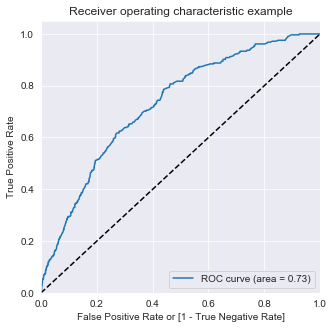

In [113]:
draw_roc(y_train_pred_final['10yrCHD'], y_train_pred_final['10yrCHD_prob'])

In [114]:
# Lets create columns with probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['10yrCHD_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,10yrCHD,10yrCHD_prob,personID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.086222,3295,0,1,0,0,0,0,0,0,0,0,0
1,0,0.092981,1801,0,1,0,0,0,0,0,0,0,0,0
2,0,0.214441,2292,0,1,1,1,0,0,0,0,0,0,0
3,0,0.094507,1505,0,1,0,0,0,0,0,0,0,0,0
4,0,0.065348,1307,0,1,0,0,0,0,0,0,0,0,0


In [115]:
#accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['10yrCHD'],y_train_pred_final[i])
    totall = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/totall
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.197380  0.996491  0.079316
0.1   0.1  0.504517  0.859649  0.452048
0.2   0.2  0.769648  0.473684  0.813375
0.3   0.3  0.866757  0.098246  0.980301
0.4   0.4  0.872177  0.021053  0.997926
0.5   0.5  0.871725  0.014035  0.998445
0.6   0.6  0.872177  0.007018  1.000000
0.7   0.7  0.871274  0.000000  1.000000
0.8   0.8  0.871274  0.000000  1.000000
0.9   0.9  0.871274  0.000000  1.000000


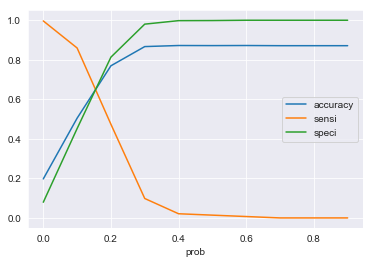

In [116]:
# plotting accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

The optimal cutoff from the above plot is 0.17

In [117]:
y_train_pred_final['Predicted'] = y_train_pred_final['10yrCHD_prob'].map(lambda x : 1 if x >0.17 else 0)

In [118]:
y_train_pred_final.head()

,10yrCHD,10yrCHD_prob,personID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.086222,3295,0,1,0,0,0,0,0,0,0,0,0
1,0,0.092981,1801,0,1,0,0,0,0,0,0,0,0,0
2,0,0.214441,2292,1,1,1,1,0,0,0,0,0,0,0
3,0,0.094507,1505,0,1,0,0,0,0,0,0,0,0,0
4,0,0.065348,1307,0,1,0,0,0,0,0,0,0,0,0


In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final['10yrCHD'],y_train_pred_final['Predicted'])
confusion

array([[1387,  542],
       [ 107,  178]])

In [120]:
# accuracy
metrics.accuracy_score(y_train_pred_final['10yrCHD'],y_train_pred_final['Predicted'])

0.7068654019873533

In [121]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [122]:
# sensistivity
sensitivity = TP/float(TP+FN)
sensitivity

0.624561403508772

In [123]:
# specificity
specificity = TN/float(TN+FP)
specificity

0.7190254017625712

In [124]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [125]:
p,r,thresholds = precision_recall_curve(y_train_pred_final['10yrCHD'], y_train_pred_final['10yrCHD_prob'])

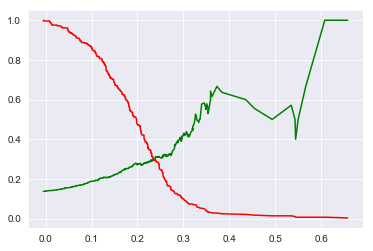

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on test set

In [127]:
X_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
426,0,64,1.0,0,0.0,0.0,0,0,0,268.0,135.0,74.0,30.18,76.0,83.0
927,1,55,1.0,1,25.0,0.0,0,1,0,230.0,142.0,74.0,23.65,72.0,82.0
2383,0,53,4.0,0,0.0,0.0,0,1,0,310.0,146.0,91.0,29.30,75.0,72.0
1713,1,44,1.0,1,40.0,0.0,0,0,0,227.0,146.5,97.0,26.92,80.0,67.0
1404,0,63,2.0,0,0.0,0.0,0,1,0,276.0,144.0,90.0,21.35,70.0,78.0


In [128]:
X_test[['totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.transform(X_test[['totChol','sysBP','diaBP','BMI','heartRate','glucose']])

In [129]:
X_test = X_test[col]

In [130]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [131]:
y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred[:10]

426     0.191110
927     0.292696
2383    0.164341
1713    0.170372
1404    0.247195
2201    0.090159
3663    0.058544
1162    0.222726
385     0.040447
38      0.075414
dtype: float64

In [133]:
y_test_pred1 = pd.DataFrame(y_test_pred)

In [134]:
y_test_pred1.head()

,0
426,0.191110
927,0.292696
2383,0.164341
1713,0.170372
1404,0.247195


In [135]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,TenYearCHD
426,0
927,0
2383,1
1713,0
1404,0


In [136]:
y_pred_final = pd.concat([y_test_df,y_test_pred1], axis =1)

In [137]:
y_pred_final.head()

,TenYearCHD,0
426,0,0.191110
927,0,0.292696
2383,1,0.164341
1713,0,0.170372
1404,0,0.247195


In [138]:
# renaming column 0
y_pred_final = y_pred_final.rename(columns = {0:'Decease_Prob'})

In [139]:
y_pred_final.head()

,TenYearCHD,Decease_Prob
426,0,0.191110
927,0,0.292696
2383,1,0.164341
1713,0,0.170372
1404,0,0.247195


In [140]:
# creating new column to mark final predictions
y_pred_final['Final_Prediction'] = y_pred_final.Decease_Prob.map(lambda x: 1 if x>0.17 else 0)

In [141]:
y_pred_final.head()

,TenYearCHD,Decease_Prob,Final_Prediction
426,0,0.191110,1
927,0,0.292696,1
2383,1,0.164341,0
1713,0,0.170372,1
1404,0,0.247195,1


In [142]:
confusion_test= metrics.confusion_matrix(y_pred_final['TenYearCHD'],y_pred_final['Final_Prediction'])
confusion_test

array([[556, 260],
       [ 49,  84]])

In [143]:
metrics.accuracy_score(y_pred_final.TenYearCHD,y_pred_final.Final_Prediction)

0.6743940990516333

In [144]:
TN = confusion_test[0,0]
FP = confusion_test[0,1]
FN = confusion_test[1,0]
TP = confusion_test[1,1]

In [145]:
# Deriving sensitivity and specificity
test_sensitivity = TP / float(FN+TP)
print(test_sensitivity)

0.631578947368421


In [146]:
test_specificity = TN / float(TN+FP)
print(test_specificity)

0.6813725490196079


In [147]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2214
Model:                            GLM   Df Residuals:                     2208
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.10384
Method:                          IRLS   Log-Likelihood:                -631.29
Date:                Mon, 09 Sep 2019   Deviance:                       229.28
Time:                        00:57:07   Pearson chi2:                     229.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3392      0.043     -7.904      0.000      -0.423      -0.255
male                0.0565      0.015      3.882      0.000       0.028       0.085
age                 0.0083      0.001      9.655      0.000       0.007       0.010
cigsPerDay          0.0022      0.001      3.487      0.000       0.001       0.003
prevalentStroke     0.2873      0.094      3.065      0.002       0.104       0.471
prevalentHyp        0.0644      0.016      3.943      0.000       0.032       0.096
===================================================================================
"""

In [148]:
fin = y_pred_final['Final_Prediction'].sum()/len(y_pred_final.Decease_Prob) *100

In [149]:
fin

36.248682824025295

### Model Summary

The model has 67% accuracy on the test data set.The sensitivity is 0.63 and specificity is 0.68. The model has predicted 36.24 % of the people are likely to develope Coronary Heart Disease